<a href="https://colab.research.google.com/github/pejmanS21/deep-utils-notebooks/blob/main/Deep_Utils_Tutorial_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# deep_utils
### Tutorial pt.1



## Download deep_utils library

In [ ]:
!pip install -U deep_utils

     |████████████████████████████████| 248 kB 5.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## download image from web for testing

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/en/a/a0/Grogu_%28Star_Wars%29.jpg

--2022-03-30 11:43:52--  https://upload.wikimedia.org/wikipedia/en/a/a0/Grogu_%28Star_Wars%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33307 (33K) [image/jpeg]
Saving to: ‘Grogu_(Star_Wars).jpg’

Grogu_(Star_Wars).j 100%[===================>]  32.53K  --.-KB/s    in 0.01s   

2022-03-30 11:43:52 (2.73 MB/s) - ‘Grogu_(Star_Wars).jpg’ saved [33307/33307]



## Tutorial pt.1

### import necessary libraries

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### get_img_shape
get the image and return image dimensions

```python
from deep_utils import get_img_shape
```

In [ ]:
from deep_utils import get_img_shape

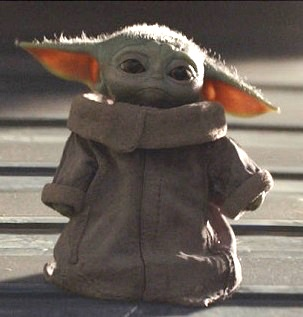

In [ ]:
image = cv2.imread('/content/Grogu_(Star_Wars).jpg')
Image.fromarray(image[..., ::-1])

In [ ]:
get_img_shape(image)

(1, 317, 303, 3)

### get_conf_matrix
calculate the confusion matrix and save the image

```python
from deep_utils import get_conf_matrix
```

In [ ]:
from deep_utils import get_conf_matrix

In [ ]:
y_true = np.random.randint(0, 2, 20)
y_pred = np.random.randint(0, 2, 20)

y_true, y_pred

(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]))

#### print results as numpy array and save the figure

In [ ]:
get_conf_matrix({0: 'a' , 1: 'b'}, y_true=y_true, y_pred=y_pred, save_path='./')

[INFO] Confusion matrix is successfully generated!


array([[1, 7],
       [7, 5]])

#### show the saved figure

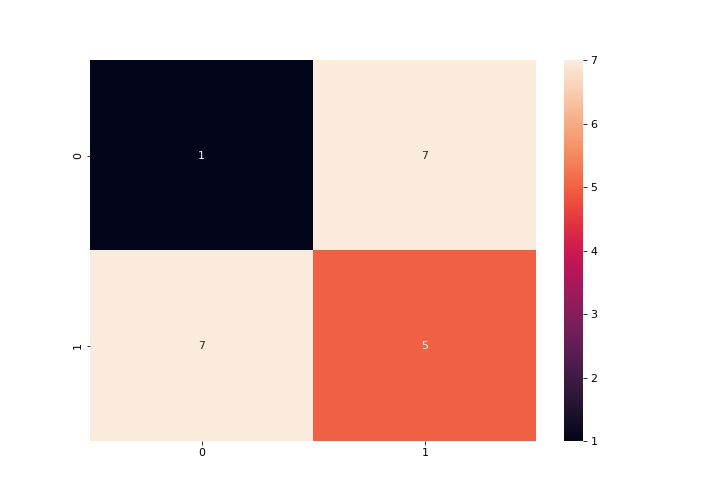

In [ ]:
Image.open('/content/conf_matrix.jpg')

### get_cls_report
print classification report and save it in a file<br>
used in ML

```python
from deep_utils import get_cls_report
```

In [ ]:
from deep_utils import get_cls_report

In [ ]:
print(get_cls_report(y_true=y_true, y_pred=y_pred, save_path='./cls_report.txt'))

[INFO] Successfully generated classification report
              precision    recall  f1-score   support

           0       0.12      0.12      0.12         8
           1       0.42      0.42      0.42        12

    accuracy                           0.30        20
   macro avg       0.27      0.27      0.27        20
weighted avg       0.30      0.30      0.30        20



#### display saved results in .txt file

In [ ]:
!cat cls_report.txt

              precision    recall  f1-score   support

           0       0.12      0.12      0.12         8
           1       0.42      0.42      0.42        12

    accuracy                           0.30        20
   macro avg       0.27      0.27      0.27        20
weighted avg       0.30      0.30      0.30        20


### pickle utils
read, and write contents in pickle format
```python
from deep_utils import dump_pickle, load_pickle
```

In [ ]:
from deep_utils import dump_pickle, load_pickle

In [ ]:
dump_pickle('/content/deep_pickle.pkl', {'A':0, 'B':1, 'C':2})

In [ ]:
loaded_pkl = load_pickle('deep_pickle.pkl')
loaded_pkl

{'A': 0, 'B': 1, 'C': 2}

### encode and decode
change an image to base64 format and base64 text to image
```python
from deep_utils import img_to_b64, b64_to_img
```



In [ ]:
from deep_utils import img_to_b64, b64_to_img

In [ ]:
image_b64 = img_to_b64(image)
image_b64

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAE9AS8DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD8w5PCfhExA3HhfTdn+zp8Xr9KrT+DPBM7fL4P01v92wi/wrVTDQja33VpxeeJd0fzN0+lc/NU7/19x3cxjS+D/C8dsYV8I6bjP8VtF/hUX/CH+DS0dxceF9O3Rf8ATlF/hWzNbBGkk/i/660vkcf8fEjI/wCNXuivgMeTwb4

In [ ]:
result = b64_to_img(image_b64)
result.shape

(317, 303, 3)

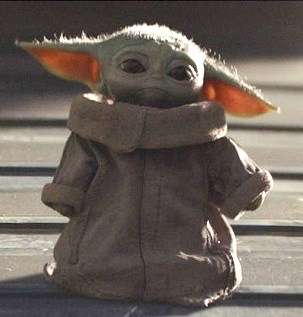

In [ ]:
Image.fromarray(result[..., ::-1])

### get_logger
easy way to use log messages instead of doing it yourself

```python
from deep_utils import get_logger
```



In [ ]:
from deep_utils import get_logger

#### logger handler

In [ ]:
logger = get_logger('deep_utils', './DU_logger.log')

[INFO] Successfully created logger for deep_utils


#### [INFO] logs

In [ ]:
logger.info('Test1')

2022-03-30 11:44:10,033 - deep_utils - INFO - Test1


Test1


#### [ERROR] logs

In [ ]:
logger.error("Test2")

2022-03-30 11:44:10,048 - deep_utils - ERROR - Test2


Test2


#### [WARNING] logs

In [ ]:
logger.warning('Test3')

2022-03-30 11:44:10,058 - deep_utils - WARNING - Test3


Test3


#### print saved logs in `DU_logger.log` file

In [ ]:
%%bash

cat DU_logger.log

2022-03-30 11:44:10,033 - deep_utils - INFO - Test1
2022-03-30 11:44:10,048 - deep_utils - ERROR - Test2
2022-03-30 11:44:10,058 - deep_utils - WARNING - Test3


### download_file
download files, and zipfiles within your code

```python
from deep_utils import download_file
```



In [ ]:
from deep_utils import download_file

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/en/a/a0/Grogu_%28Star_Wars%29.jpg'
download_file(url, file_name='downloaded_image.jpg')

[INFO] Downloading data from https://upload.wikimedia.org/wikipedia/en/a/a0/Grogu_%28Star_Wars%29.jpg
[██████████████████████████████████████████████████]


'./downloaded_image.jpg'

In [ ]:
download_file("https://github.com/Practical-AI/deep_utils/archive/refs/tags/0.4.2.zip", './',
                  unzip=True, remove_zip=True)

[INFO] Downloading data from https://github.com/Practical-AI/deep_utils/archive/refs/tags/0.4.2.zip
[██████████████████████████████████████████████████]
[INFO] Successfully extracted ./deep_utils-0.4.2.zip to ./!
[INFO] Successfully removed ./deep_utils-0.4.2.zip!


'./deep_utils-0.4.2.zip'

### color_str
print text in terminal and kernel in color format

```python
from deep_utils import color_str
```



In [ ]:
from deep_utils import color_str

In [ ]:
print(color_str('Hello from deep_utils', color='red'))
print(color_str('Hello from deep_utils', color='white'))
print(color_str('Hello from deep_utils', color='underline'))
print(color_str('Hello from deep_utils', color='blue'))
print(color_str('Hello from deep_utils', color='green'))
print(color_str('Hello from deep_utils', color='yellow'))

Hello from deep_utils
Hello from deep_utils
Hello from deep_utils
Hello from deep_utils
Hello from deep_utils
Hello from deep_utils


### repeat_dimension
make an image bigger without lose quality

```python
from deep_utils import repeat_dimension
```

In [ ]:
from deep_utils import repeat_dimension

In [ ]:
changed_image = repeat_dimension(image, n=2, d=1, verbose=1)

[INFO] Successfully create result.shape: (317, 606, 3)!


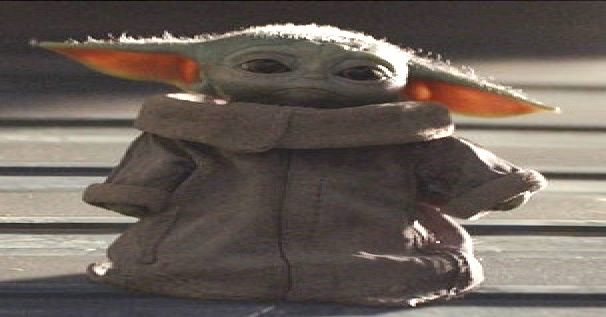

In [ ]:
Image.fromarray(changed_image[..., ::-1])

### image utils
check that the inputed file is an image or not <br>
get the file extension 

```python
from deep_utils import is_image_file, split_extension
```

In [ ]:
from deep_utils import is_image_file, split_extension

In [ ]:
is_image_file('/content/downloaded_image.jpg')

True

In [ ]:
split_extension('/content/downloaded_image.jpg')

('/content/downloaded_image', '.jpg')

### decorators
decorators for functions to calculate time and so on

```python
from deep_utils import get_func_time

@get_func_time
def dummy_function(...):
    ...
```

    >>> elapsed time for dummy_function: 0.206

In [ ]:
from deep_utils import get_func_time    # decorator

In [ ]:
@get_func_time
def dummy_function(a: int = 10):
    import random
    p = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.'
    chars = p.split(' ')
    b = []
    for i in range(1, a + 1):
        b.append(i ** 5)
    
    for i in b:
        m_list = random.choices(chars, k=i)
        words = ''
        for m in m_list:
            words += (' ' + m)
    print('End of function!')

In [ ]:
dummy_function(a=20)

End of function!
elapsed time for dummy_function: 5.4899
